In [181]:
# Import modules
import pandas as pd
import mysql.connector
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
## Connect to database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Goodboy.5",
  database="insertion_pro",
  auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

In [204]:
# Afficher tout les établissements qui ont changé de nom
mycursor.execute("SELECT nom_etablissement, nom_etablissement_actuel FROM etablissement WHERE nom_etablissement_actuel != nom_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

nom_etablissement = df[0]
nom_etablissement_actuel = df[1]

# Visualisation des résultats
df


,0,1
0,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA)
1,Bordeaux 1 - Sciences technologies,Université de Bordeaux
2,Bordeaux 2 - Victor Segalen,Université de Bordeaux
3,Bordeaux 4 - Montesquieu,Université de Bordeaux
4,Montpellier 1,Université de Montpellier
5,Montpellier 2 - Sciences techniques du Languedoc,Université de Montpellier
6,Grenoble 1 - Joseph Fourier,Université Grenoble Alpes (UGA)
7,Grenoble 2 - Pierre Mendès France,Université Grenoble Alpes (UGA)
8,Grenoble 3 - Stendhal,Université Grenoble Alpes (UGA)
9,Grenoble Alpes,Université Grenoble Alpes (UGA)


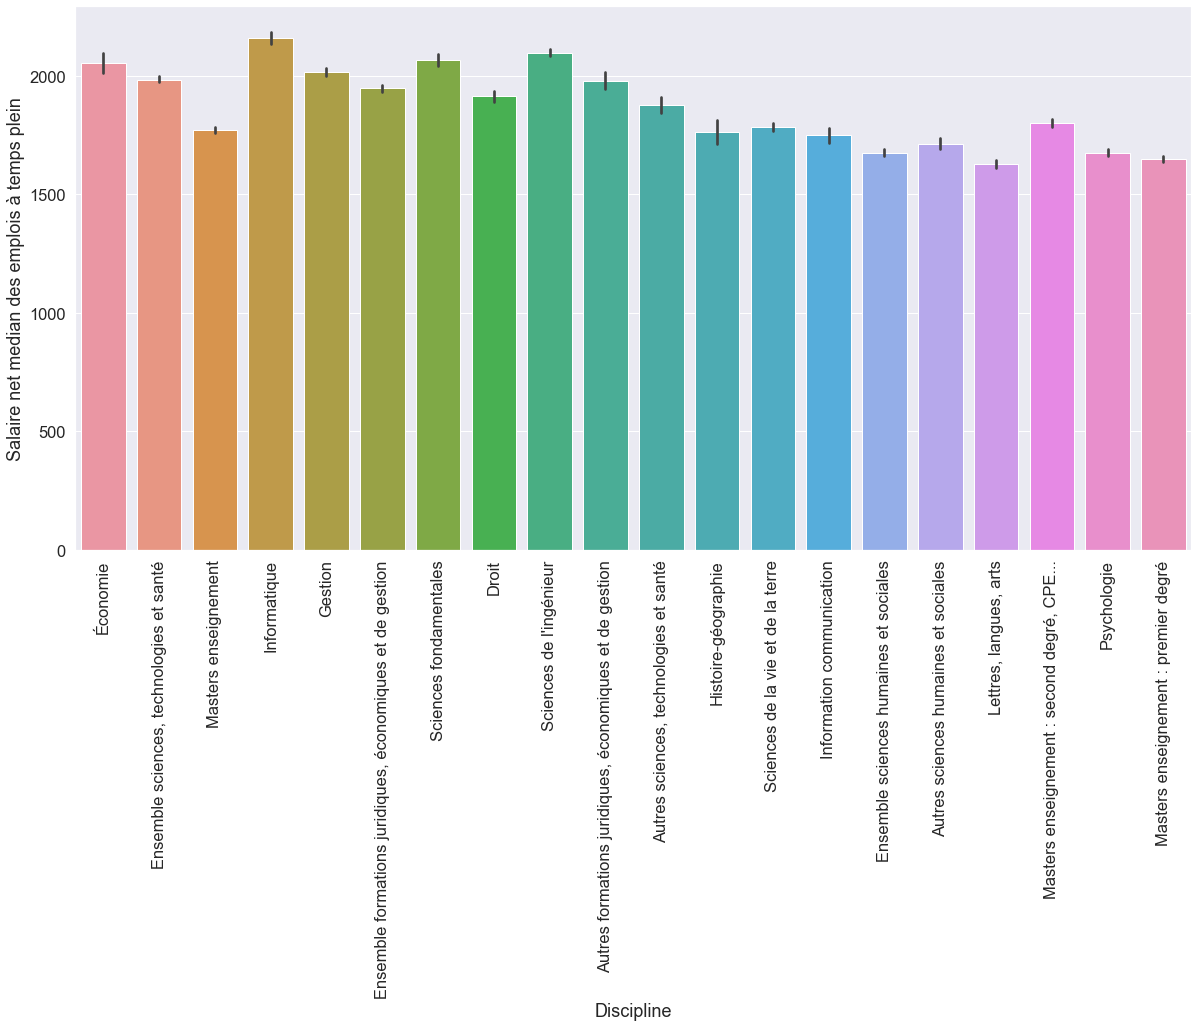

In [205]:
# Afficher les salaire_net_median_des_emplois_a_temps_plein les plus élevé et la discpline correspondante et l'établissement
mycursor.execute("SELECT nom_discipline, salaire_net_median_des_emplois_a_temps_plein FROM Etablissement join Statistiques on Etablissement.id_etablissement = Statistiques.id_etablissement JOIN  Discipline on Statistiques.id_discipline = Discipline.id_discipline ORDER BY salaire_net_median_des_emplois_a_temps_plein DESC ")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

plt.figure(figsize=(20,10))

# Visualisation
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.barplot(x=df[0], y=df[1])
# set Name on Horizontal axis
plt.xlabel("Discipline")
# set Name on Vertical axis
plt.ylabel("Salaire net median des emplois à temps plein")
# set Title
plt.title("")

# Set the names of the disipline inside the barplot
plt.xticks(rotation=90)
plt.show()

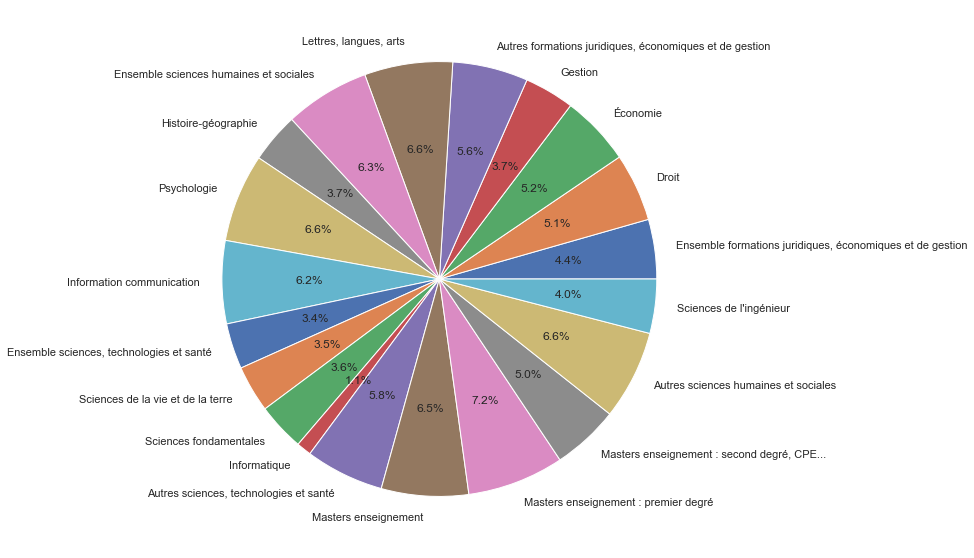

In [206]:
# Afficher la part des femmes par discipline non nulle
mycursor.execute("SELECT distinct nom_discipline, femmes FROM Discipline join Statistiques using (id_discipline) where femmes is not null group by nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)
 #visualisation des données
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

sns.color_palette("bright")
plt.pie(df[1], labels=df[0], autopct='%1.1f%%');

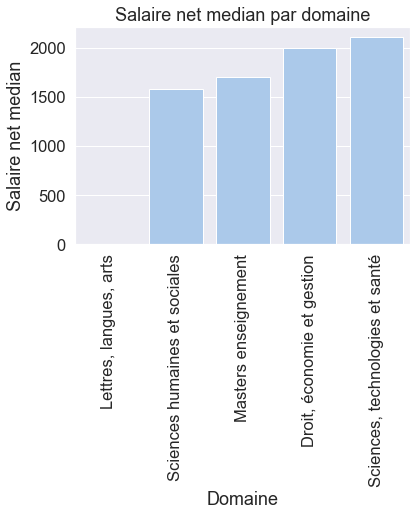

In [207]:
# Afficher le salaire net median par Domaine
sql = "SELECT distinct salaire_net_median_des_emplois_a_temps_plein, nom_domaine from Statistiques join Discipline on Statistiques.id_discipline = Discipline.id_discipline join Domaine on discipline.code_domaine = Domaine.code_domaine group by discipline.code_domaine"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

domaine = df[1]
salaire = df[0]

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= domaine, y= salaire, color="b")
plt.xlabel('Domaine')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par domaine")
plt.xticks(rotation=90)
plt.show()

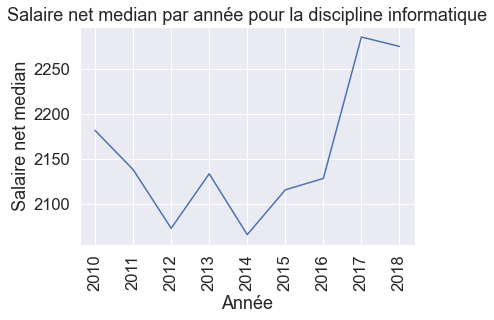

In [208]:
# afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour la discipline 'Informatique'
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline where nom_discipline='informatique' GROUP BY annee;"

mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

annees = df[0]
salaire = df[1]

sns.set_theme(style="darkgrid")
# Visualiser les données
sns.set(font_scale=1.5)
sns.lineplot(x= annees, y= salaire)
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour la discipline informatique")
plt.xticks(rotation=90)
plt.show()

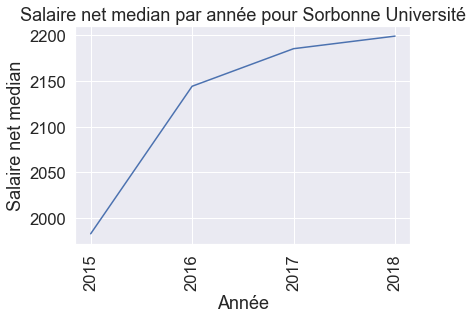

In [209]:
# Afficher l'évolution du salaire net median par année pour l'université de piérre et marie curie
sql = "select annee, avg(salaire_net_median_des_emplois_a_temps_plein) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('Salaire net median')
plt.title("Salaire net median par année pour Sorbonne Université")
plt.xticks(rotation=90)
plt.show()

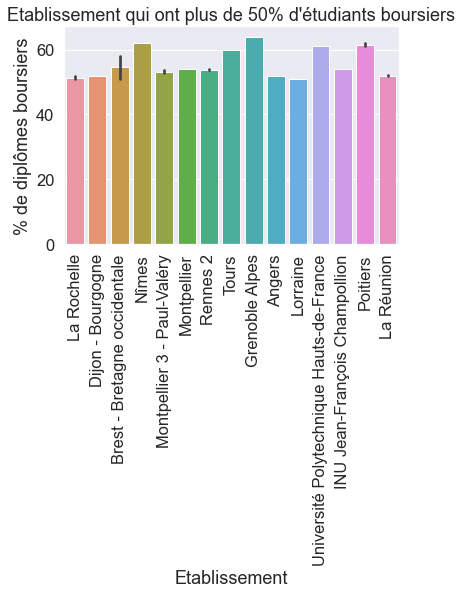

In [210]:
# Afficher les etablissement qui ont plus de 50% d'étudiants boursiers
sql = "select nom_etablissement , de_diplomes_boursiers from etablissement join statistiques using (id_etablissement) where de_diplomes_boursiers > 50;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('% de diplômes boursiers')
plt.title("Etablissement qui ont plus de 50% d'étudiants boursiers")
plt.xticks(rotation=90)
plt.show()

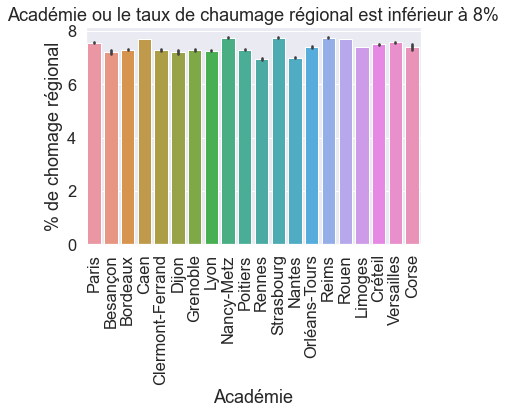

In [211]:
# Afficher les académies ou le taux de chaumage regionel est inférieur à 8%
sql = "select nom_academie, taux_de_chomage_regional from academie join etablissement using (id_academie) join statistiques using (id_etablissement) where taux_de_chomage_regional < 8;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Académie')
plt.ylabel('% de chomage régional')
plt.title("Académie ou le taux de chaumage régional est inférieur à 8%")
plt.xticks(rotation=90)
plt.show()

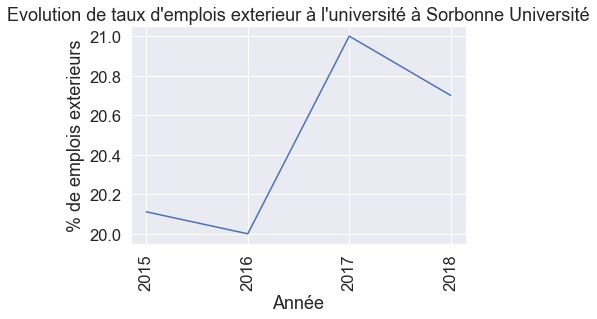

In [212]:
# Afficher l'evolution de taux d'mplois exterieur à l'université à Sorbonne Université
sql = "select annee, avg(emplois_exterieurs_a_la_region_de_luniversite) from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement where nom_etablissement='Sorbonne Université' or nom_etablissement_actuel ='Sorbonne Université' GROUP BY annee;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[1])
plt.xlabel('Année')
plt.ylabel('% de emplois exterieurs')
plt.title("Evolution de taux d'emplois exterieur à l'université à Sorbonne Université")
plt.xticks(rotation=90)
plt.show()


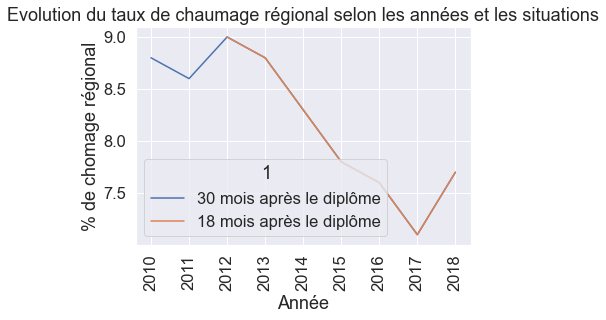

In [213]:
# Afficher l'evolution du taux de chaumage régional  selon les années et les situations
sql = "select annee, situation, taux_de_chomage_regional from enquete join statistiques using (annee, situation, diplome) join Etablissement on statistiques.id_etablissement = Etablissement.id_etablissement GROUP BY annee, situation;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.lineplot(x= df[0], y= df[2], hue= df[1])
plt.xlabel('Année')
plt.ylabel('% de chomage régional')
plt.title("Evolution du taux de chaumage régional selon les années et les situations")
plt.xticks(rotation=90)
plt.show()

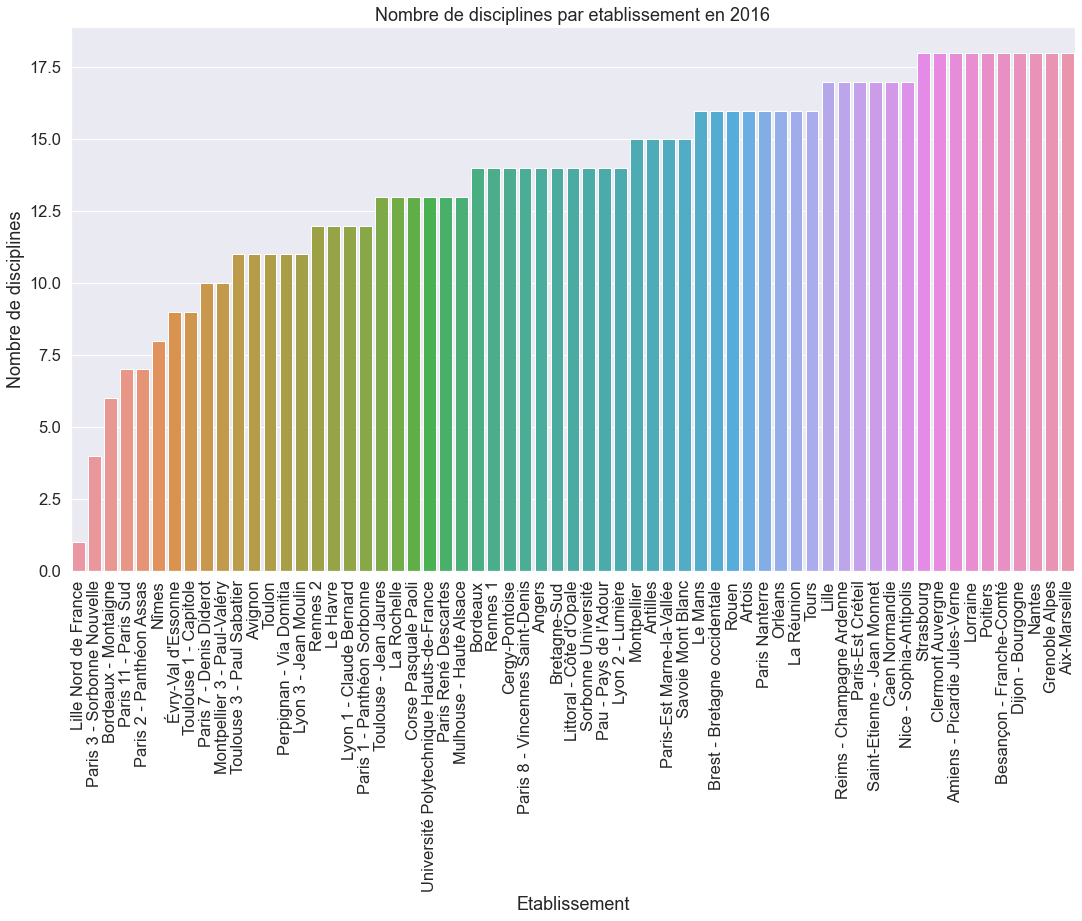

In [214]:
#Affichier le nombre de disciplines par etablissement en 2016
sql = "select nom_etablissement, count(id_discipline) l from etablissement join statistiques using (id_etablissement) join discipline using(id_discipline) where annee = 2016 and situation ='30 mois après le diplôme' GROUP BY nom_etablissement order by l;"
mycursor.execute(sql)
myresult = mycursor.fetchall()

# Convertir en dataframe
df = pd.DataFrame(myresult)
plt.figure(figsize=(18,10))
# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df[0], y= df[1])
plt.xlabel('Etablissement')
plt.ylabel('Nombre de disciplines')
plt.title("Nombre de disciplines par etablissement en 2016")
plt.xticks(rotation=90)
plt.show()


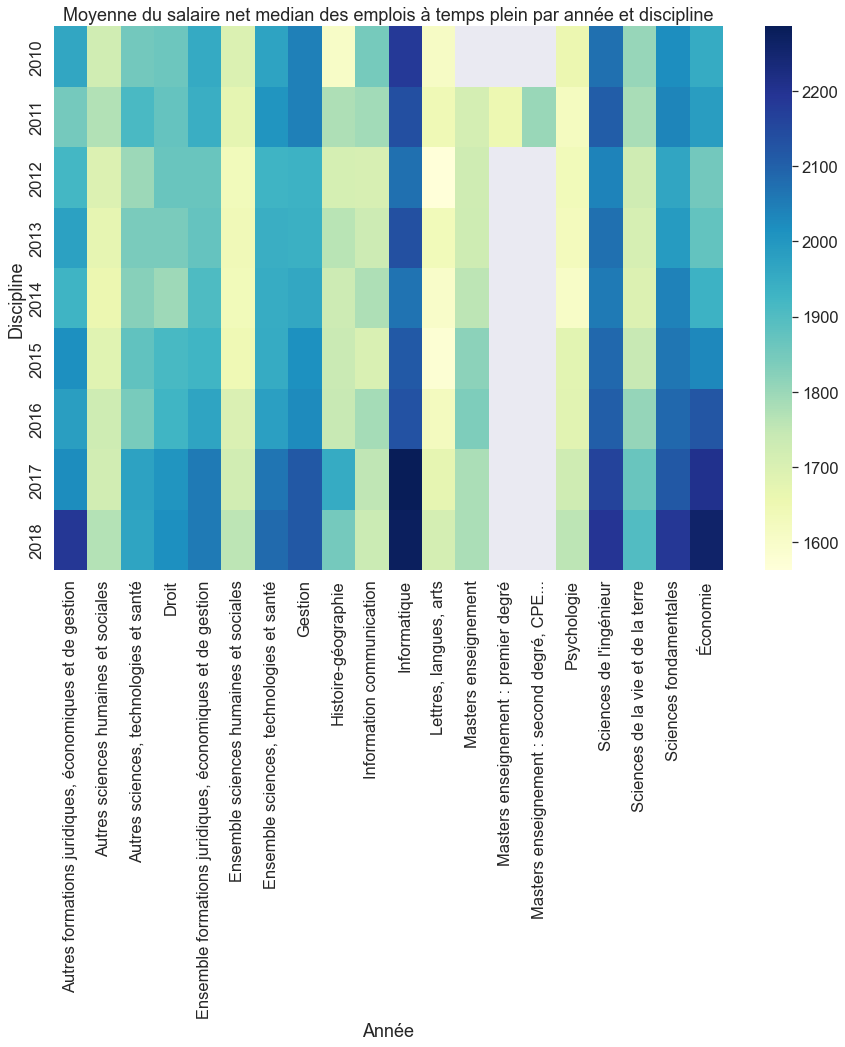

In [225]:
#-- afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour pour tout les noms des disciplines
mycursor.execute("select annee, avg(salaire_net_median_des_emplois_a_temps_plein), nom_discipline from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline  GROUP BY annee, nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)


df.columns = ['annee', 'salaire_net_median_des_emplois_a_temps_plein', 'nom_discipline']

# Visualiser les données

plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.heatmap(df.pivot_table(index='annee', columns='nom_discipline', values='salaire_net_median_des_emplois_a_temps_plein'), fmt='.2f', cmap='YlGnBu')
plt.xlabel('Année')
plt.ylabel('Discipline')
plt.title("Moyenne du salaire net median des emplois à temps plein par année et discipline")
plt.show()

In [227]:
# Affichage du salaire_net_median_des_emplois_a_temps_plein le plus élevé et le nom de  discpline correspondante et  le nom de l'établissement
mycursor.execute("select max(salaire_net_median_des_emplois_a_temps_plein), nom_etablissement, nom_discipline from statistiques join discipline on statistiques.id_discipline = discipline.id_discipline join etablissement on statistiques.id_etablissement = etablissement.id_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)
df.columns = ['salaire_net_median_des_emplois_a_temps_plein', 'nom_etablissement', 'nom_discipline']

salaire = df['salaire_net_median_des_emplois_a_temps_plein']
etablissement = df['nom_etablissement']
discipline = df['nom_discipline']

# Visualiser les données
print("Le salaire net median des emplois à temps plein le plus élevé est de {}€ par an pour la discipline {} de l'établissement {}".format(salaire, discipline, etablissement))


Le salaire net median des emplois à temps plein le plus élevé est de 0    3150.0
Name: salaire_net_median_des_emplois_a_temps_plein, dtype: float64€ par an pour la discipline 0    Masters enseignement : second degré, CPE...
Name: nom_discipline, dtype: object de l'établissement 0    Nice - Sophia-Antipolis
Name: nom_etablissement, dtype: object


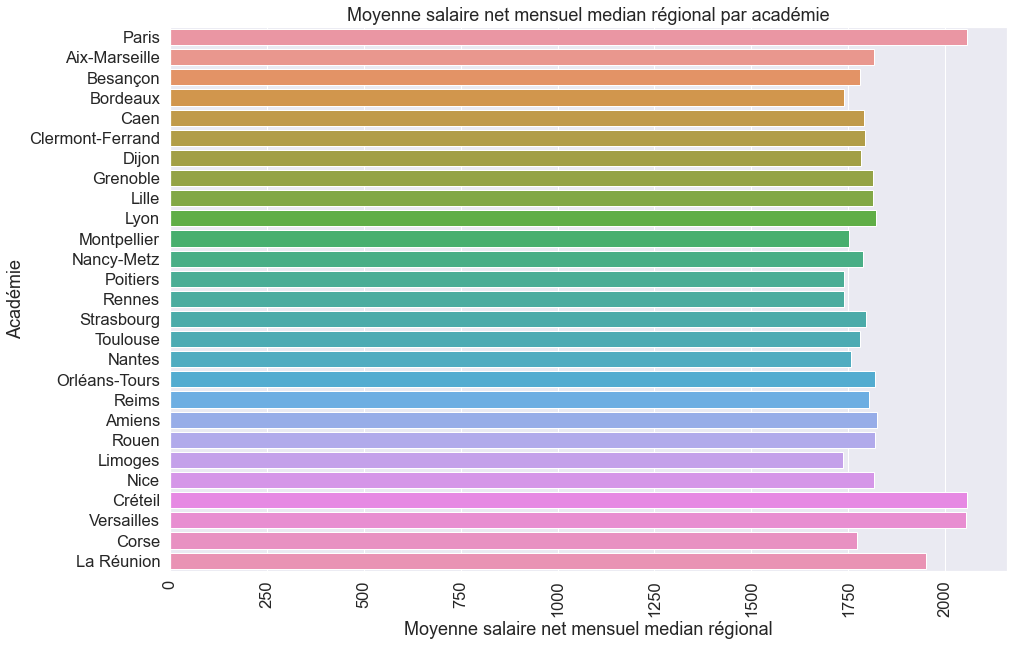

In [230]:
# Affichage des moyenne salaire_net_mensuel_median_regional et de nom_académie correspondante par ordre décroissant en éliminant les doublons
mycursor.execute("select distinct nom_academie , avg(salaire_net_mensuel_median_regional) as moy from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie group by nom_academie having moy is not null ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)

# Visualiser les données
df.columns = ['nom_academie', 'moy']

academie = df['nom_academie']
moy = df['moy']

# Visualiser les données
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= moy, y= academie)
plt.xlabel('Moyenne salaire net mensuel median régional')
plt.ylabel('Académie')
plt.title("Moyenne salaire net mensuel median régional par académie")
plt.xticks(rotation=90)
plt.show()

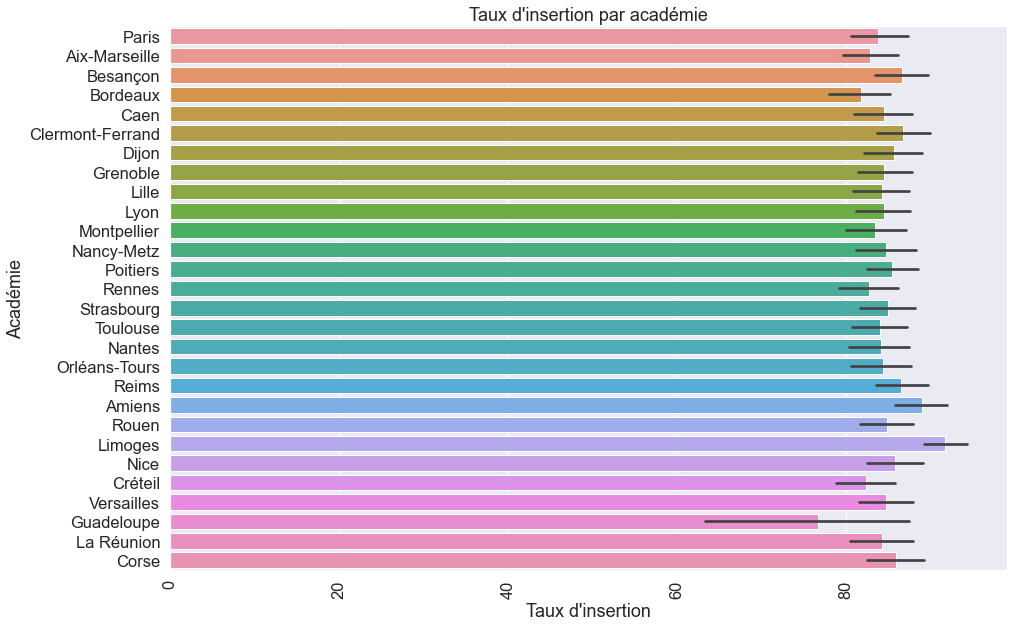

In [231]:
# Affichage le taux_insertion par academie
mycursor.execute("select distinct taux_dinsertion, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie ORDER BY taux_dinsertion DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)

# Visualiser les données
df.columns = ['taux_dinsertion', 'nom_academie']

taux = df['taux_dinsertion']
academie = df['nom_academie']

# Visualiser les données
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= taux, y= academie)
plt.xlabel('Taux d\'insertion')
plt.ylabel('Académie')
plt.title("Taux d\'insertion par académie")
plt.xticks(rotation=90)
plt.show()

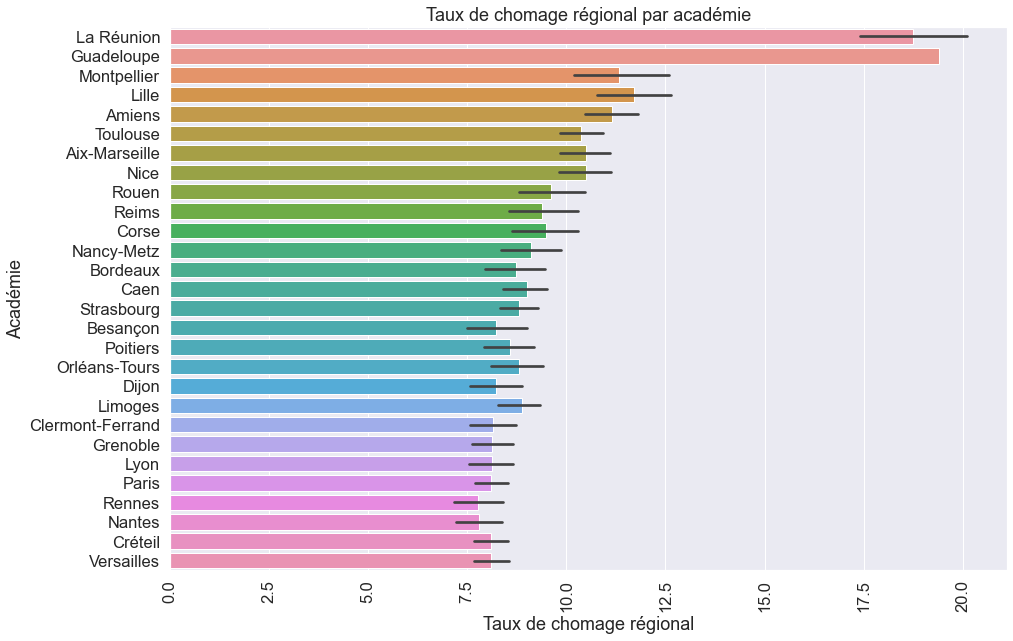

In [232]:

#afficher le taux_chaomge_regional par academie
mycursor.execute("select distinct taux_de_chomage_regional, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie where taux_de_chomage_regional is Not NULL ORDER BY taux_de_chomage_regional DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)

# Visualiser les données
df.columns = ['taux_de_chomage_regional', 'nom_academie']

taux = df['taux_de_chomage_regional']
academie = df['nom_academie']

# Visualiser les données
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= taux, y= academie)
plt.xlabel('Taux de chomage régional')
plt.ylabel('Académie')
plt.title("Taux de chomage régional par académie")
plt.xticks(rotation=90)
plt.show()

In [234]:
#afficher l'année la plus récente de l'enquete la plus récente
mycursor.execute("select distinct annee from statistiques order by annee desc limit 1")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)

# Visualiser les données
df.columns = ['annee']
print("L'année la plus récente de l'enquete la plus récente est {}".format(df['annee'][0]))

L'année la plus récente de l'enquete la plus récente est 2018


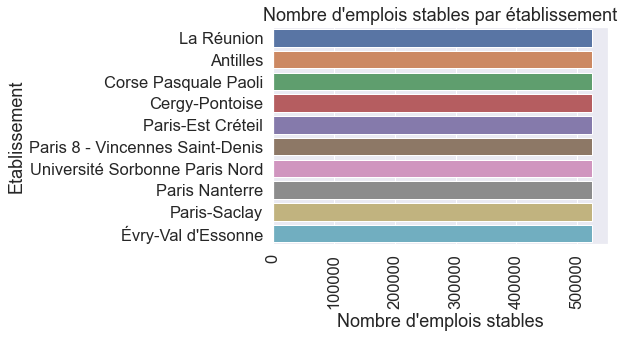

In [236]:
# afficher les 10 etablissement ayant les emplois stables les plus elevé
mycursor.execute("select sum(emplois_stables), nom_etablissement from statistiques join etablissement GROUP BY nom_etablissement ORDER BY sum(emplois_stables) DESC limit 10")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)

# Visualiser les données
df.columns = ['emplois_stables', 'nom_etablissement']

# Visualiser les données
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x= df['emplois_stables'], y= df['nom_etablissement'])
plt.xlabel('Nombre d\'emplois stables')
plt.ylabel('Etablissement')
plt.title("Nombre d\'emplois stables par établissement")
plt.xticks(rotation=90)
plt.show()


In [238]:
#afficher toutes les informations de l'établissement dont le nom est "Pierre et Marie Curie" en utilisant un JOIN avec la table etablissement
mycursor.execute("select distinct * from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement where etablissement.nom_etablissement = 'Sorbonne Université'")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0755890V,disc01,2015,18 mois après le diplôme,MASTER LMD,NaN,NaN,NaN,NaN,NaN,...,27.0,7.8,2060,NaN,NaN,NaN,0755890V,Sorbonne Université,None,A01
1,0755890V,disc01,2015,30 mois après le diplôme,MASTER LMD,NaN,NaN,NaN,NaN,NaN,...,27.0,7.8,2060,NaN,NaN,NaN,0755890V,Sorbonne Université,None,A01
2,0755890V,disc01,2016,18 mois après le diplôme,MASTER LMD,NaN,NaN,NaN,NaN,NaN,...,23.0,7.6,1980,NaN,NaN,NaN,0755890V,Sorbonne Université,None,A01
3,0755890V,disc01,2016,30 mois après le diplôme,MASTER LMD,NaN,NaN,NaN,NaN,NaN,...,23.0,7.6,1980,NaN,NaN,NaN,0755890V,Sorbonne Université,None,A01
4,0755890V,disc01,2017,18 mois après le diplôme,MASTER LMD,NaN,NaN,NaN,NaN,NaN,...,26.0,7.1,2120,NaN,NaN,NaN,0755890V,Sorbonne Université,None,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0755890V,disc18,2016,30 mois après le diplôme,MASTER ENS,98.0,97.0,98.0,93.0,1900.0,...,19.0,7.6,1980,92.0,11.0,77.0,0755890V,Sorbonne Université,None,A01
102,0755890V,disc18,2017,18 mois après le diplôme,MASTER ENS,100.0,96.0,92.0,96.0,1800.0,...,16.0,7.1,2120,94.0,6.0,86.0,0755890V,Sorbonne Université,None,A01
103,0755890V,disc18,2017,30 mois après le diplôme,MASTER ENS,99.0,98.0,97.0,95.0,1820.0,...,16.0,7.1,2120,96.0,6.0,86.0,0755890V,Sorbonne Université,None,A01
104,0755890V,disc18,2018,18 mois après le diplôme,MASTER ENS,99.0,98.0,96.0,99.0,1800.0,...,11.0,7.7,2170,93.0,6.0,80.0,0755890V,Sorbonne Université,None,A01
